# **WIN PREDICTOR MODEL USING ML**




**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pdata = pd.read_csv("/content/drive/MyDrive/AIML PROJECT/IPL_Data.csv", encoding = 'unicode_escape')

In [5]:
vdata = pd.read_csv("/content/drive/MyDrive/AIML PROJECT/IPL2023_Matches.csv", encoding = 'unicode_escape')

In [6]:
match = pd.read_csv("/content/matches.csv", encoding = 'unicode_escape')

In [9]:
delivery = pd.read_csv("/content/deliveries.csv", encoding = 'unicode_escape')

**Loading Dataset**


In [10]:
pdata.head()

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0


In [11]:
vdata.head()

,match_no,city,date_of_match,venue,Home_team,Away_team,toss_winner,winner,man_of_the_match,result,result_margin,eliminator,umpire1,umpire2
0,1,Ahmedabad,3/31/2023,Narendra Modi Stadium,Gujarat Titans,Chennai Super Kings,Gujarat Titans,Gujarat Titans,Rashid Khan,Wickets,5,N,Nitin Menon,Saiyed Khalid
1,2,Mohali,4/1/2023,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Arshdeep Singh,Runs,7,DLS,Bruce Oxenford,Yeshwant Barde
2,3,Lucknow,4/1/2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,Lucknow Super Giants,Mark Wood,Runs,50,N,Anil Kumar Chaudhary,Nikhil Patwardhan
3,4,Hyderabad,4/2/2023,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Jos Buttler,Runs,72,N,KN Anantha Padmanabhan,Rohan Pandit
4,5,Bengaluru,4/2/2023,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Faf du Plessis,Wickets,8,N,Nitin Menon,Tapan Sharma


In [12]:
print(pdata.dtypes)

Name                object
Team                object
Url                 object
Type                object
ValueinCR          float64
Full Name           object
Born                object
Age                 object
National Side       object
Batting Style       object
Bowling             object
Sport               object
MatchPlayed        float64
InningsBatted      float64
NotOuts            float64
RunsScored         float64
HighestInnScore     object
100s               float64
50s                float64
4s                 float64
6s                 float64
BattingAVG         float64
BattingS/R         float64
CatchesTaken       float64
StumpingsMade      float64
Ducks              float64
R/O                float64
InningsBowled      float64
Overs              float64
Maidens            float64
RunsConceded       float64
Wickets            float64
Best                object
3s                 float64
5s                 float64
BowlingAVG         float64
EconomyRate        float64
S

In [13]:
pdata.describe()

,ValueinCR,MatchPlayed,InningsBatted,NotOuts,RunsScored,100s,50s,4s,6s,BattingAVG,...,Overs,Maidens,RunsConceded,Wickets,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
count,237.000000,162.000000,162.000000,162.000000,153.000000,162.000000,162.000000,162.000000,162.000000,145.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,105.000000,122.000000,105.000000,122.000000
mean,3.695781,50.043210,35.512346,8.179012,792.287582,0.185185,4.148148,65.987654,28.907407,17.988207,...,105.414754,0.844262,842.024590,29.827869,1.942623,0.090164,34.496476,8.656393,24.841429,32.057377
std,4.238092,53.592359,48.516148,11.182786,1334.058241,0.652013,8.865610,121.038723,49.706068,11.656085,...,130.178621,1.595554,993.185995,38.280110,2.924107,0.315026,19.152172,1.788897,13.250690,37.352088
min,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,6.000000,1.000000
25%,0.400000,10.000000,5.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,8.570000,...,11.000000,0.000000,95.250000,3.000000,0.000000,0.000000,24.530000,7.680000,18.640000,5.000000
50%,1.900000,29.000000,14.000000,4.000000,148.000000,0.000000,0.000000,8.500000,4.000000,16.000000,...,55.200000,0.000000,455.500000,14.500000,0.000000,0.000000,30.040000,8.290000,21.820000,20.000000
75%,6.500000,75.250000,50.500000,11.000000,954.000000,0.000000,3.750000,79.000000,37.750000,27.330000,...,144.125000,1.000000,1169.250000,41.500000,3.000000,0.000000,38.120000,9.105000,25.840000,43.000000
max,17.000000,220.000000,208.000000,73.000000,6283.000000,5.000000,50.000000,654.000000,227.000000,47.430000,...,583.000000,9.000000,4061.000000,167.000000,14.000000,2.000000,153.000000,18.000000,108.000000,171.000000


In [14]:
vdata.describe()

,match_no,result_margin
count,70.000000,70.000000
mean,35.500000,17.742857
std,20.351085,22.549582
min,1.000000,0.000000
25%,18.250000,5.000000
50%,35.500000,7.000000
75%,52.750000,22.500000
max,70.000000,112.000000


In [15]:
pdata.shape

(237, 39)

**DATA PREPROCESSING**


converting object to float data type


In [16]:
pdata['HighestInnScore'] = pd.to_numeric(pdata['HighestInnScore'], errors='coerce')

In [17]:
print(pdata.dtypes)

Name                object
Team                object
Url                 object
Type                object
ValueinCR          float64
Full Name           object
Born                object
Age                 object
National Side       object
Batting Style       object
Bowling             object
Sport               object
MatchPlayed        float64
InningsBatted      float64
NotOuts            float64
RunsScored         float64
HighestInnScore    float64
100s               float64
50s                float64
4s                 float64
6s                 float64
BattingAVG         float64
BattingS/R         float64
CatchesTaken       float64
StumpingsMade      float64
Ducks              float64
R/O                float64
InningsBowled      float64
Overs              float64
Maidens            float64
RunsConceded       float64
Wickets            float64
Best                object
3s                 float64
5s                 float64
BowlingAVG         float64
EconomyRate        float64
S

In [18]:
print(vdata.dtypes)

match_no             int64
city                object
date_of_match       object
venue               object
Home_team           object
Away_team           object
toss_winner         object
winner              object
man_of_the_match    object
result              object
result_margin        int64
eliminator          object
umpire1             object
umpire2             object
dtype: object


**DATA MUNGING**

In [19]:
print("adding a new column-")
pdata['boundaries'] = pdata['4s'] + pdata['6s']
pdata.head()

adding a new column-


,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc,boundaries
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0,15.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0,15.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0,778.0


In [20]:
print("deleting insignificant columns")
pdata.drop('Url', axis=1,inplace = True)
pdata.drop('ValueinCR', axis=1,inplace = True)
pdata.drop('Full Name', axis=1,inplace = True)
pdata.drop('Born', axis=1,inplace = True)
pdata.drop('Sport', axis=1,inplace = True)
pdata.drop('NotOuts', axis=1,inplace = True)
pdata.drop('Ducks', axis=1,inplace = True)
pdata.drop('R/O', axis=1,inplace = True)
pdata.drop('Maidens', axis=1,inplace = True)
pdata.drop('RunsConceded', axis=1,inplace = True)
pdata.drop('3s', axis=1,inplace = True)
pdata.drop('5s', axis=1,inplace = True)
pdata.drop('S/R', axis=1,inplace = True)
pdata.drop('Mtc', axis=1,inplace = True)

pdata.head()

deleting insignificant columns


,Name,Team,Type,Age,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,RunsScored,...,BattingS/R,CatchesTaken,StumpingsMade,InningsBowled,Overs,Wickets,Best,BowlingAVG,EconomyRate,boundaries
0,Mayank Agarwal,PBKS,Batsman,"31 Years, 0 Months, 28 Days",India,Right Handed,Off break,100.0,95.0,2131.0,...,135.47,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,288.0
1,Liam Livingstone,PBKS,All-Rounder,"28 Years, 7 Months, 11 Days",England,Right Handed,Leg break,9.0,9.0,112.0,...,125.84,7.0,0.0,1.0,1.0,0.0,0/13 v MI,NaN,13.00,15.0
2,Kagiso Rabada,PBKS,Bowler,"26 Years, 9 Months, 22 Days",South Africa,Left Handed,Right-arm fast,50.0,18.0,138.0,...,102.98,23.0,0.0,50.0,190.0,76.0,4/21 v RCB,20.52,8.21,15.0
3,Shahrukh Khan,PBKS,All-Rounder,"26 Years, 9 Months, 20 Days",India,Right Handed,Off break,11.0,10.0,153.0,...,134.21,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19.0
4,Shikhar Dhawan,PBKS,Batsman,"36 Years, 3 Months, 10 Days",India,Left Handed,Off break,192.0,191.0,5784.0,...,126.64,82.0,0.0,6.0,8.0,4.0,1/7 v DC,16.50,8.25,778.0


In [21]:
print("deleting insignificant columns")
vdata.drop('man_of_the_match', axis=1,inplace = True)
vdata.drop('result_margin', axis=1,inplace = True)
vdata.drop('eliminator', axis=1,inplace = True)
vdata.drop('umpire1', axis=1,inplace = True)
vdata.drop('umpire2', axis=1,inplace = True)

vdata.head()

deleting insignificant columns


,match_no,city,date_of_match,venue,Home_team,Away_team,toss_winner,winner,result
0,1,Ahmedabad,3/31/2023,Narendra Modi Stadium,Gujarat Titans,Chennai Super Kings,Gujarat Titans,Gujarat Titans,Wickets
1,2,Mohali,4/1/2023,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,Punjab Kings,Runs
2,3,Lucknow,4/1/2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,Lucknow Super Giants,Runs
3,4,Hyderabad,4/2/2023,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Runs
4,5,Bengaluru,4/2/2023,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Wickets


In [22]:
bat_data = pdata.loc[pdata['Type']=='Batsman ']
bowl_data = pdata.loc[pdata['Type']=='Bowler ']
allround_data = pdata.loc[pdata['Type']=='All-Rounder ']
wk_data = pdata.loc[pdata['Type']=='Wicket-Keeper ']

In [23]:
bat_data.shape

(46, 26)

In [24]:
bowl_data.shape

(77, 26)

In [25]:
allround_data.shape

(87, 26)

In [26]:
wk_data.shape

(26, 26)

**Cleaning & Filtering the Data**

*Cleaning Batsmen Data*

In [27]:
bat_data = bat_data.drop(bat_data.loc[:, 'CatchesTaken':'EconomyRate'].columns, axis = 1)
bat_data.drop('Bowling', axis=1, inplace=True)

bat_data.head()

,Name,Team,Type,Age,National Side,Batting Style,MatchPlayed,InningsBatted,RunsScored,HighestInnScore,100s,50s,4s,6s,BattingAVG,BattingS/R,boundaries
0,Mayank Agarwal,PBKS,Batsman,"31 Years, 0 Months, 28 Days",India,Right Handed,100.0,95.0,2131.0,NaN,1.0,11.0,203.0,85.0,23.41,135.47,288.0
4,Shikhar Dhawan,PBKS,Batsman,"36 Years, 3 Months, 10 Days",India,Left Handed,192.0,191.0,5784.0,NaN,2.0,44.0,654.0,124.0,34.84,126.64,778.0
15,Bhanuka Rajapaksa,PBKS,Batsman,"30 Years, 4 Months, 23 Days",Sri Lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Kane Williamson,SRH,Batsman,"31 Years, 7 Months, 7 Days",New Zealand,Right Handed,63.0,62.0,1885.0,NaN,0.0,17.0,165.0,56.0,40.10,131.26,221.0
28,Rahul Tripathi,SRH,Batsman,"31 Years, 0 Months, 14 Days",India,Right Handed,62.0,60.0,1385.0,NaN,0.0,7.0,136.0,48.0,26.13,136.31,184.0


In [28]:
bat_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,2
National Side,2
Batting Style,4
MatchPlayed,16
InningsBatted,16
RunsScored,16
HighestInnScore,46


In [29]:
bat_data.dropna(subset=['National Side'], inplace=True)
bat_data.dropna(subset=['Batting Style'], inplace=True)
bat_data.dropna(subset=['Age'], inplace=True)

In [30]:
bat_data = bat_data.fillna(0)
bat_data.shape

(42, 17)

In [31]:
bat_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,0
National Side,0
Batting Style,0
MatchPlayed,0
InningsBatted,0
RunsScored,0
HighestInnScore,0


*Cleaning Bowler Data*

In [32]:
bowl_data = bowl_data.drop(bowl_data.loc[:, 'InningsBatted':'BattingS/R'].columns, axis=1)
bowl_data.drop('boundaries', axis=1, inplace=True)

bowl_data.head()

,Name,Team,Type,Age,National Side,Batting Style,Bowling,MatchPlayed,CatchesTaken,StumpingsMade,InningsBowled,Overs,Wickets,Best,BowlingAVG,EconomyRate
2,Kagiso Rabada,PBKS,Bowler,"26 Years, 9 Months, 22 Days",South Africa,Left Handed,Right-arm fast,50.0,23.0,0.0,50.0,190.0,76.0,4/21 v RCB,20.52,8.21
7,Rahul Chahar,PBKS,Bowler,"22 Years, 7 Months, 12 Days",India,Right Handed,Leg break googly,42.0,11.0,0.0,41.0,150.0,43.0,4/27 v KKR,25.97,7.44
8,Arshdeep Singh,PBKS,Bowler,"23 Years, 1 Months, 8 Days",India,Left Handed,Left-arm medium fast,23.0,6.0,0.0,23.0,76.1,30.0,5/32 v RR,22.30,8.78
10,Vaibhav Arora,PBKS,Bowler,"24 Years, 3 Months, 1 Days",India,Right Handed,Right-arm fast medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nathan Ellis,PBKS,Bowler,"27 Years, 5 Months, 23 Days",Australia,Right Handed,Right-arm fast medium,3.0,NaN,NaN,3.0,11.0,1.0,1/12 v MI,90.00,8.18


In [33]:
bowl_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,1
National Side,1
Batting Style,1
Bowling,1
MatchPlayed,19
CatchesTaken,28
StumpingsMade,28


In [34]:
bowl_data.dropna(subset=['National Side'], inplace=True)
bowl_data.dropna(subset=['Batting Style'], inplace=True)
bowl_data.dropna(subset=['Age'], inplace=True)
bowl_data.dropna(subset=['Bowling'], inplace=True)

In [35]:
bowl_data = bowl_data.fillna(0)
bowl_data.shape

(76, 16)

In [36]:
bowl_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,0
National Side,0
Batting Style,0
Bowling,0
MatchPlayed,0
CatchesTaken,0
StumpingsMade,0


*Cleaning All-Rounder Data*

In [37]:
allround_data = allround_data.drop(bowl_data.loc[:, 'CatchesTaken':'InningsBowled'].columns, axis=1)

allround_data.head()

,Name,Team,Type,Age,National Side,Batting Style,Bowling,MatchPlayed,InningsBatted,RunsScored,...,4s,6s,BattingAVG,BattingS/R,Overs,Wickets,Best,BowlingAVG,EconomyRate,boundaries
1,Liam Livingstone,PBKS,All-Rounder,"28 Years, 7 Months, 11 Days",England,Right Handed,Leg break,9.0,9.0,112.0,...,9.0,6.0,14.00,125.84,1.0,0.0,0/13 v MI,NaN,13.00,15.0
3,Shahrukh Khan,PBKS,All-Rounder,"26 Years, 9 Months, 20 Days",India,Right Handed,Off break,11.0,10.0,153.0,...,9.0,10.0,21.85,134.21,NaN,NaN,NaN,NaN,NaN,19.0
6,Odean Smith,PBKS,All-Rounder,"25 Years, 4 Months, 14 Days",West Indies,Right Handed,Right-arm medium,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Harpreet Brar,PBKS,All-Rounder,"26 Years, 6 Months, 0 Days",India,Left Handed,Slow left-arm orthodox,10.0,6.0,84.0,...,5.0,3.0,NaN,120.00,32.0,5.0,3/19 v RCB,45.6,7.12,8.0
11,Raj Bawa,PBKS,All-Rounder,"19 Years, 4 Months, 3 Days",India,Left Handed,Right-arm medium fast,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
allround_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,2
National Side,2
Batting Style,4
Bowling,4
MatchPlayed,34
InningsBatted,34
RunsScored,36


In [39]:
allround_data.dropna(subset=['National Side'], inplace=True)
allround_data.dropna(subset=['Batting Style'], inplace=True)
allround_data.dropna(subset=['Age'], inplace=True)
allround_data.dropna(subset=['Bowling'], inplace=True)

In [40]:
allround_data = allround_data.fillna(0)
allround_data.shape

(83, 23)

In [41]:
allround_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,0
National Side,0
Batting Style,0
Bowling,0
MatchPlayed,0
InningsBatted,0
RunsScored,0


*Cleaning Wicket-Keeper Data*

In [42]:
wk_data = wk_data.drop(wk_data.loc[:, 'InningsBowled':'EconomyRate'].columns, axis = 1)
wk_data.drop('Bowling', axis=1, inplace=True)

wk_data.head()

,Name,Team,Type,Age,National Side,Batting Style,MatchPlayed,InningsBatted,RunsScored,HighestInnScore,100s,50s,4s,6s,BattingAVG,BattingS/R,CatchesTaken,StumpingsMade,boundaries
5,Jonny Bairstow,PBKS,Wicket-Keeper,"32 Years, 5 Months, 19 Days",England,Right Handed,28.0,28.0,1038.0,NaN,1.0,7.0,99.0,46.0,41.52,142.19,18.0,4.0,145.0
13,Prabhsimran Singh,PBKS,Wicket-Keeper,"21 Years, 7 Months, 5 Days",India,Right Handed,5.0,5.0,50.0,NaN,0.0,0.0,4.0,2.0,10.00,90.90,2.0,0.0,6.0
22,Jitesh Sharma,PBKS,Wicket-Keeper,"28 Years, 4 Months, 24 Days",India,Right Handed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Nicholas Pooran,SRH,Wicket-Keeper,"26 Years, 5 Months, 14 Days",West Indies,Left Handed,33.0,31.0,606.0,NaN,0.0,2.0,35.0,44.0,22.44,154.98,11.0,0.0,79.0
39,Glenn Phillips,SRH,Wicket-Keeper,"25 Years, 3 Months, 9 Days",New Zealand,Right Handed,3.0,3.0,26.0,NaN,0.0,0.0,1.0,2.0,13.00,78.78,1.0,0.0,3.0


In [43]:
wk_data.isna().sum()

,0
Name,0
Team,0
Type,0
Age,1
National Side,1
Batting Style,1
MatchPlayed,6
InningsBatted,6
RunsScored,6
HighestInnScore,26


In [44]:
wk_data.dropna(subset=['National Side'], inplace=True)
wk_data.dropna(subset=['Batting Style'], inplace=True)
wk_data.dropna(subset=['Age'], inplace=True)

In [45]:
wk_data = wk_data.fillna(0)
wk_data.shape

(25, 19)

**Data Visualization**

*Orange Cap*

In [46]:
bat_data = bat_data.sort_values('RunsScored',ascending = False)
ocap = bat_data.iloc[:10]
ocap

,Name,Team,Type,Age,National Side,Batting Style,MatchPlayed,InningsBatted,RunsScored,HighestInnScore,100s,50s,4s,6s,BattingAVG,BattingS/R,boundaries
72,Virat Kohli,RCB,Batsman,"33 Years, 4 Months, 10 Days",India,Right Handed,207.0,199.0,6283.0,0.0,5.0,42.0,546.0,210.0,37.39,129.94,756.0
4,Shikhar Dhawan,PBKS,Batsman,"36 Years, 3 Months, 10 Days",India,Left Handed,192.0,191.0,5784.0,0.0,2.0,44.0,654.0,124.0,34.84,126.64,778.0
94,Rohit Sharma,MI,Batsman,"34 Years, 10 Months, 16 Days",India,Right Handed,213.0,208.0,5611.0,0.0,1.0,40.0,491.0,227.0,31.17,130.39,718.0
175,David Warner,DC,Batsman,"35 Years, 4 Months, 19 Days",Australia,Left Handed,150.0,150.0,5449.0,0.0,4.0,50.0,525.0,201.0,41.59,139.96,726.0
128,Robin Uthappa,CSK,Batsman,"36 Years, 4 Months, 4 Days",India,Right Handed,193.0,186.0,4722.0,0.0,0.0,25.0,462.0,168.0,27.94,130.15,630.0
157,Ajinkya Rahane,KKR,Batsman,"33 Years, 9 Months, 9 Days",India,Right Handed,151.0,141.0,3941.0,0.0,2.0,28.0,417.0,76.0,31.52,121.33,493.0
201,Manish Pandey,LSG,Batsman,"32 Years, 6 Months, 5 Days",India,Right Handed,154.0,143.0,3560.0,0.0,1.0,21.0,309.0,103.0,30.68,121.83,412.0
77,Faf du Plessis,RCB,Batsman,"37 Years, 8 Months, 2 Days",South Africa,Right Handed,100.0,93.0,2935.0,0.0,0.0,22.0,265.0,96.0,34.94,131.08,361.0
144,Shreyas Iyer,KKR,Batsman,"27 Years, 3 Months, 9 Days",India,Right Handed,87.0,87.0,2375.0,0.0,0.0,16.0,196.0,88.0,31.66,123.95,284.0
99,Suryakumar Yadav,MI,Batsman,"31 Years, 6 Months, 1 Days",India,Right Handed,115.0,100.0,2341.0,0.0,0.0,13.0,261.0,68.0,28.90,135.71,329.0


Text(0.5, 1.0, 'Orange Cap')

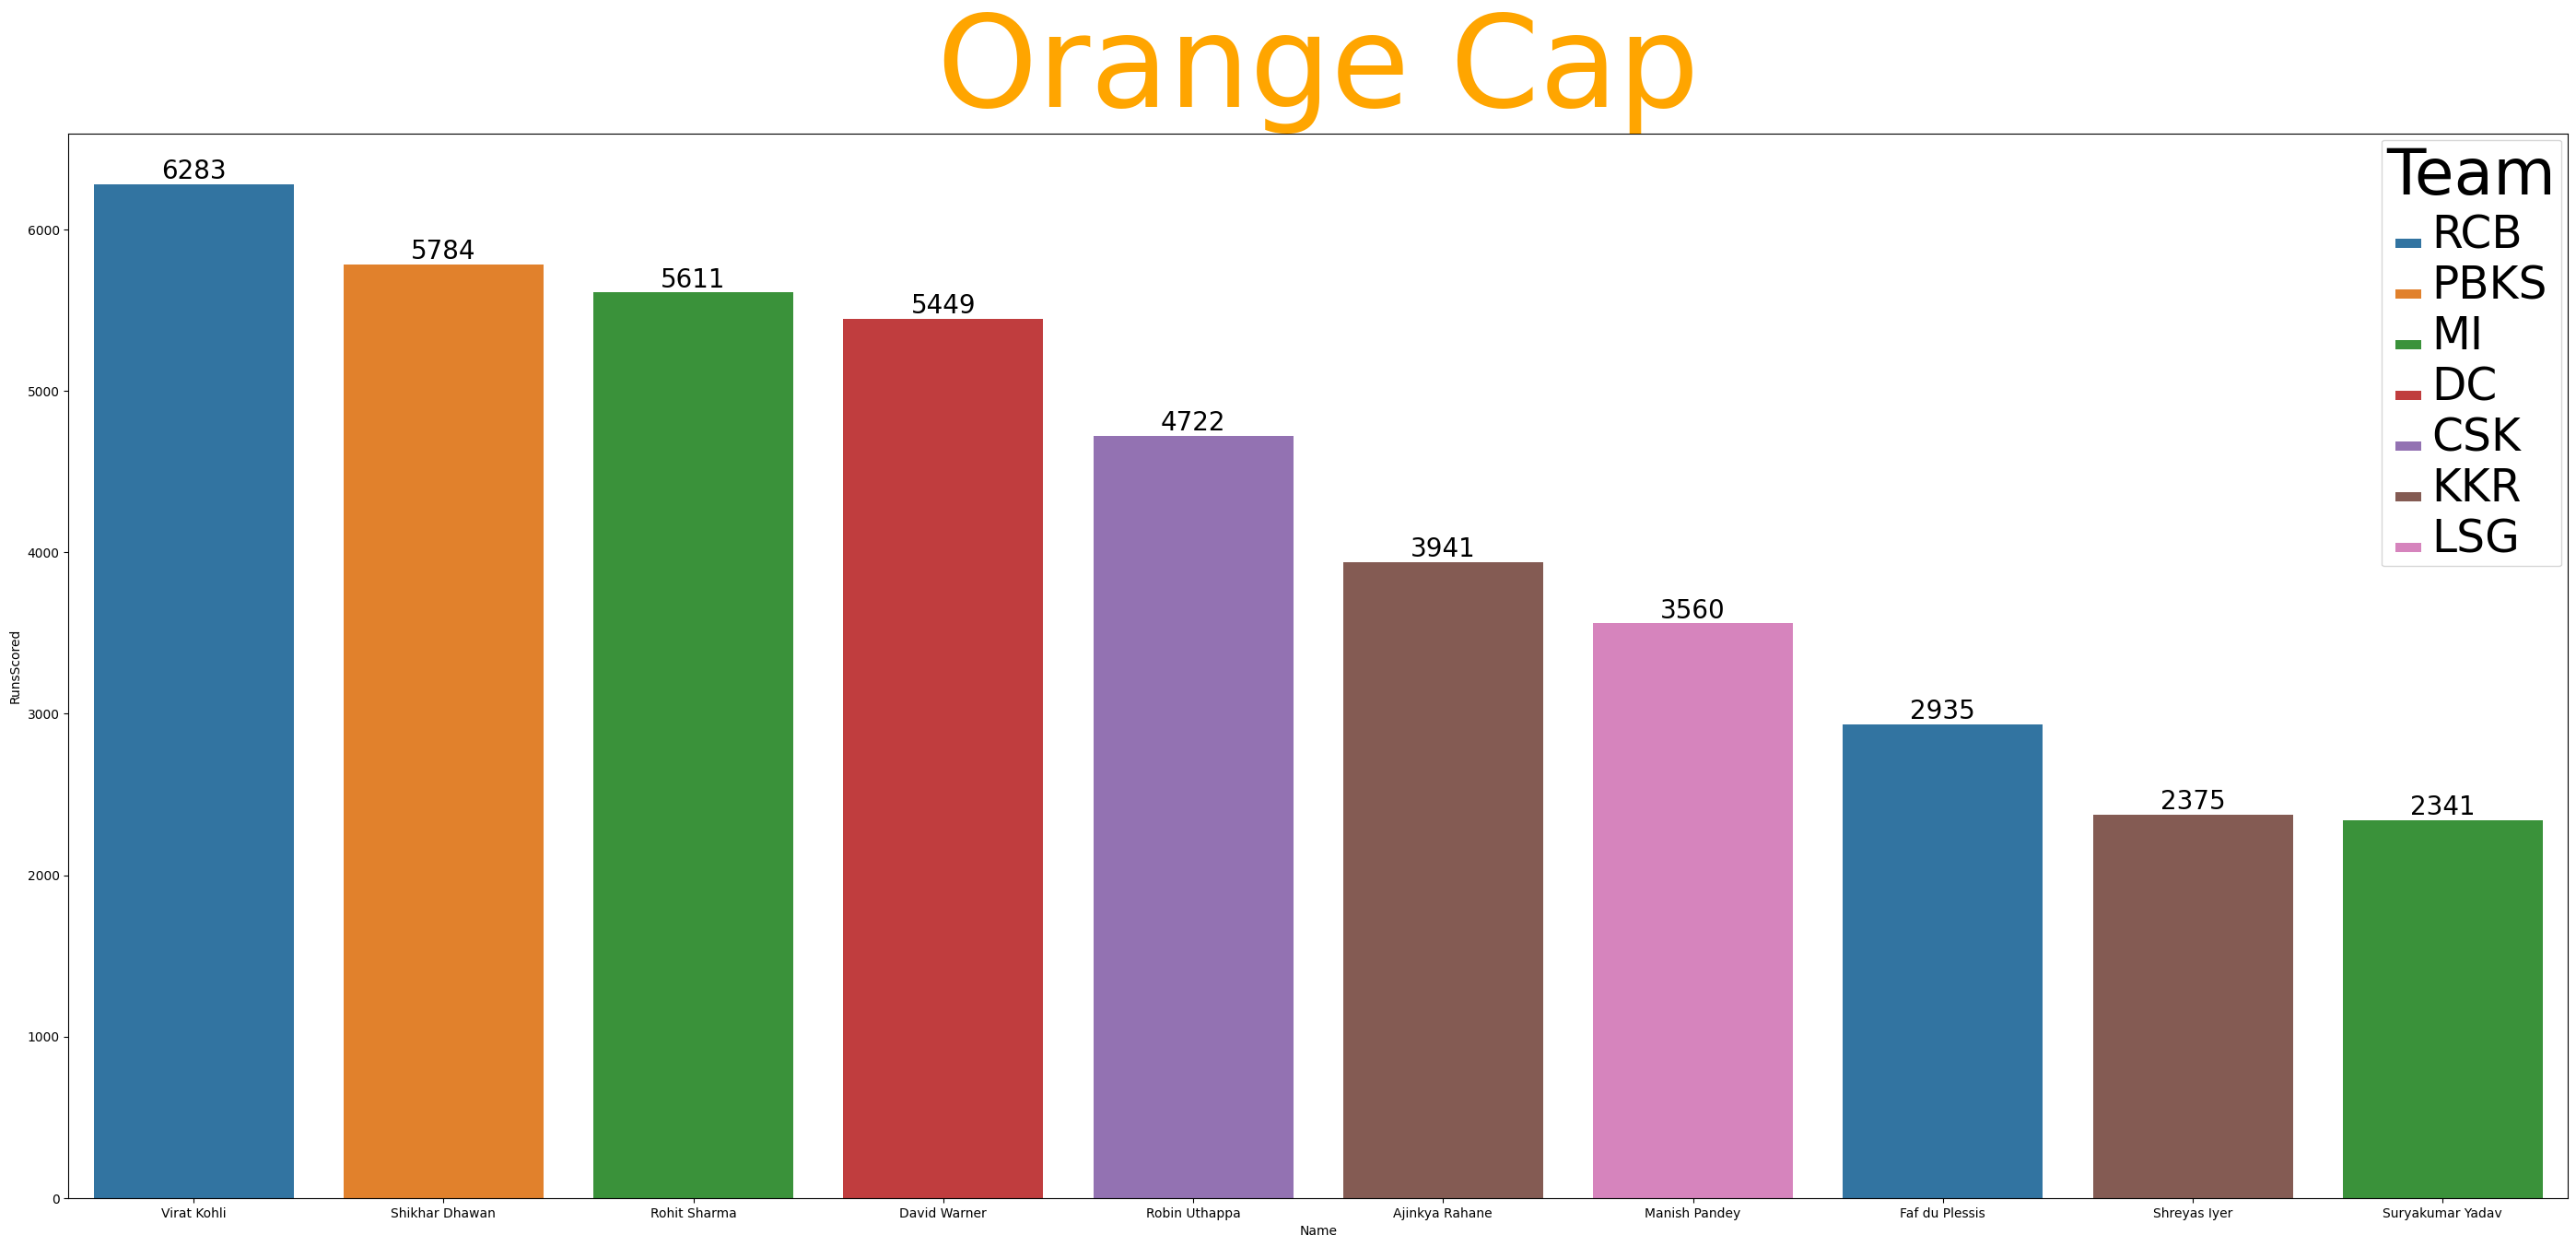

In [47]:
plt.figure(figsize = (35,15))
ax = sns.barplot(x = 'Name',y = 'RunsScored',data = ocap,hue = 'Team')
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='50')
for i in range(0,7):
  ax.bar_label(ax.containers[i], fontsize=20);
sns.set(font_scale = 1.7)
plt.title('Orange Cap', fontsize='100', color='orange')

In [48]:
bowl_data = bowl_data.sort_values('Wickets', ascending=False)
pcap = bowl_data.iloc[:10]
pcap

,Name,Team,Type,Age,National Side,Batting Style,Bowling,MatchPlayed,CatchesTaken,StumpingsMade,InningsBowled,Overs,Wickets,Best,BowlingAVG,EconomyRate
31,Bhuvneshwar Kumar,SRH,Bowler,"32 Years, 1 Months, 7 Days",India,Right Handed,Right-arm medium,132.0,27.0,0.0,132.0,491.3,142.0,5/19 v PBKS,25.26,7.30
54,Yuzvendra Chahal,RR,Bowler,"31 Years, 7 Months, 23 Days",India,Right Handed,Leg break googly,114.0,24.0,0.0,113.0,408.0,139.0,4/25 v PBKS,22.28,7.59
96,Jasprit Bumrah,MI,Bowler,"28 Years, 3 Months, 9 Days",India,Right Handed,Right-arm fast,106.0,13.0,0.0,106.0,403.4,130.0,4/14 v DC,23.05,7.42
152,Umesh Yadav,KKR,Bowler,"34 Years, 4 Months, 22 Days",India,Right Handed,Right-arm fast,121.0,29.0,0.0,120.0,420.2,119.0,4/24 v RR,30.07,8.51
16,Sandeep Sharma,PBKS,Bowler,"28 Years, 9 Months, 28 Days",India,Right Handed,Right-arm medium,99.0,12.0,0.0,99.0,366.2,112.0,4/20 v DC,25.43,7.77
214,Rashid Khan,GT,Bowler,"23 Years, 5 Months, 25 Days",Afghanistan,Right Handed,Leg break googly,76.0,20.0,0.0,76.0,302.0,93.0,3/7 v DC,20.55,6.33
106,Jaydev Unadkat,MI,Bowler,"30 Years, 4 Months, 29 Days",India,Right Handed,Left-arm medium,86.0,24.0,0.0,85.0,296.0,85.0,5/25 v DC,30.44,8.74
219,Mohammed Shami,GT,Bowler,"31 Years, 6 Months, 12 Days",India,Right Handed,Right-arm fast,77.0,11.0,0.0,77.0,278.2,79.0,3/15 v DC,30.40,8.62
2,Kagiso Rabada,PBKS,Bowler,"26 Years, 9 Months, 22 Days",South Africa,Left Handed,Right-arm fast,50.0,23.0,0.0,50.0,190.0,76.0,4/21 v RCB,20.52,8.21
52,Trent Boult,RR,Bowler,"32 Years, 7 Months, 24 Days",New Zealand,Right Handed,Left-arm fast medium,62.0,23.0,0.0,62.0,236.1,76.0,4/18 v CSK,26.09,8.39


Text(0.5, 1.0, 'Purple Cap')

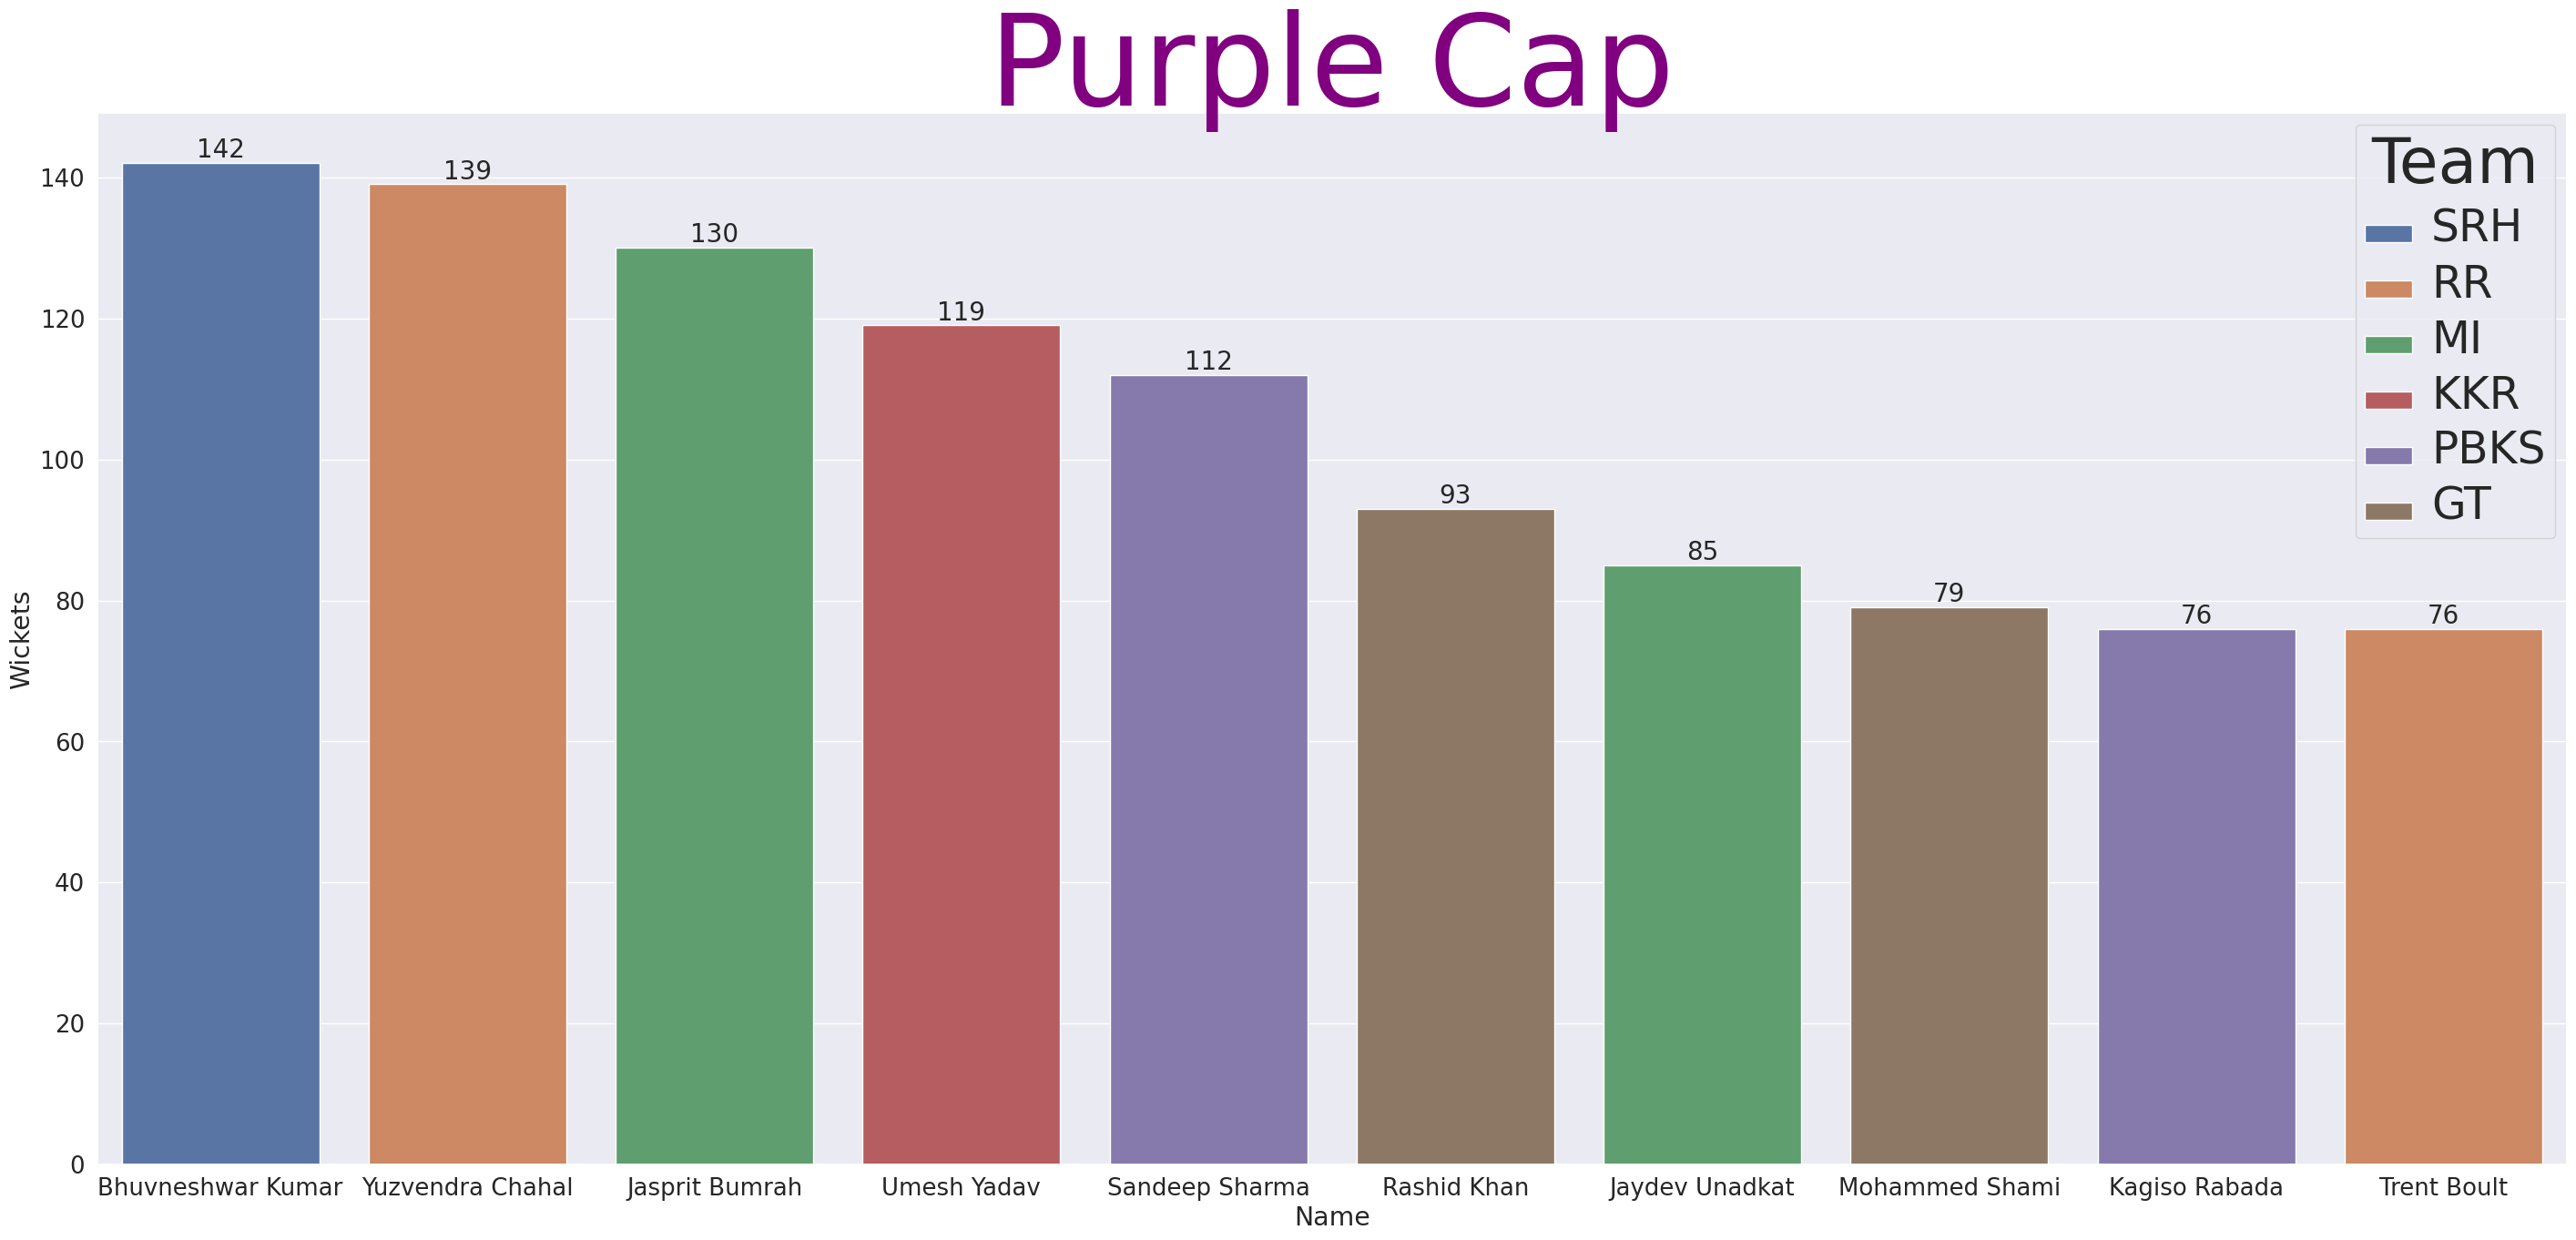

In [49]:
plt.figure(figsize = (35,15))
ax = sns.barplot(x = 'Name',y = 'Wickets',data = pcap,hue = 'Team')
plt.setp(ax.get_legend().get_texts(), fontsize='35')
plt.setp(ax.get_legend().get_title(), fontsize='50')
for i in range(0,6):
  ax.bar_label(ax.containers[i], fontsize=20);
sns.set(font_scale = 1.7)
plt.title('Purple Cap', fontsize='100', color='Purple')

In [50]:
super_striker = bat_data.sort_values('BattingS/R',ascending = False)
super_striker = super_striker.iloc[:10]
super_striker

,Name,Team,Type,Age,National Side,Batting Style,MatchPlayed,InningsBatted,RunsScored,HighestInnScore,100s,50s,4s,6s,BattingAVG,BattingS/R,boundaries
51,Shimron Hetmyer,RR,Batsman,"25 Years, 2 Months, 20 Days",West Indies,Left Handed,31.0,29.0,517.0,0.0,0.0,2.0,34.0,31.0,25.85,151.17,65.0
172,Prithvi Shaw,DC,Batsman,"22 Years, 4 Months, 7 Days",India,Right Handed,53.0,53.0,1305.0,0.0,0.0,10.0,155.0,45.0,24.62,146.30,200.0
34,Abdul Samad,SRH,Batsman,"20 Years, 4 Months, 18 Days",India,Right Handed,23.0,18.0,222.0,0.0,0.0,0.0,12.0,14.0,15.85,146.05,26.0
175,David Warner,DC,Batsman,"35 Years, 4 Months, 19 Days",Australia,Left Handed,150.0,150.0,5449.0,0.0,4.0,50.0,525.0,201.0,41.59,139.96,726.0
222,David Miller,GT,Batsman,"32 Years, 9 Months, 5 Days",South Africa,Left Handed,89.0,86.0,1974.0,0.0,1.0,10.0,137.0,90.0,32.90,136.51,227.0
56,Yashasvi Jaiswal,RR,Batsman,"20 Years, 2 Months, 18 Days",India,Left Handed,13.0,13.0,289.0,0.0,0.0,1.0,34.0,12.0,22.23,136.32,46.0
28,Rahul Tripathi,SRH,Batsman,"31 Years, 0 Months, 14 Days",India,Right Handed,62.0,60.0,1385.0,0.0,0.0,7.0,136.0,48.0,26.13,136.31,184.0
99,Suryakumar Yadav,MI,Batsman,"31 Years, 6 Months, 1 Days",India,Right Handed,115.0,100.0,2341.0,0.0,0.0,13.0,261.0,68.0,28.90,135.71,329.0
0,Mayank Agarwal,PBKS,Batsman,"31 Years, 0 Months, 28 Days",India,Right Handed,100.0,95.0,2131.0,0.0,1.0,11.0,203.0,85.0,23.41,135.47,288.0
124,Ruturaj Gaikwad,CSK,Batsman,"25 Years, 1 Months, 12 Days",India,Right Handed,22.0,22.0,839.0,0.0,1.0,7.0,80.0,29.0,46.61,132.12,109.0


Text(0.5, 1.0, 'SuperStriker of the Tournament')

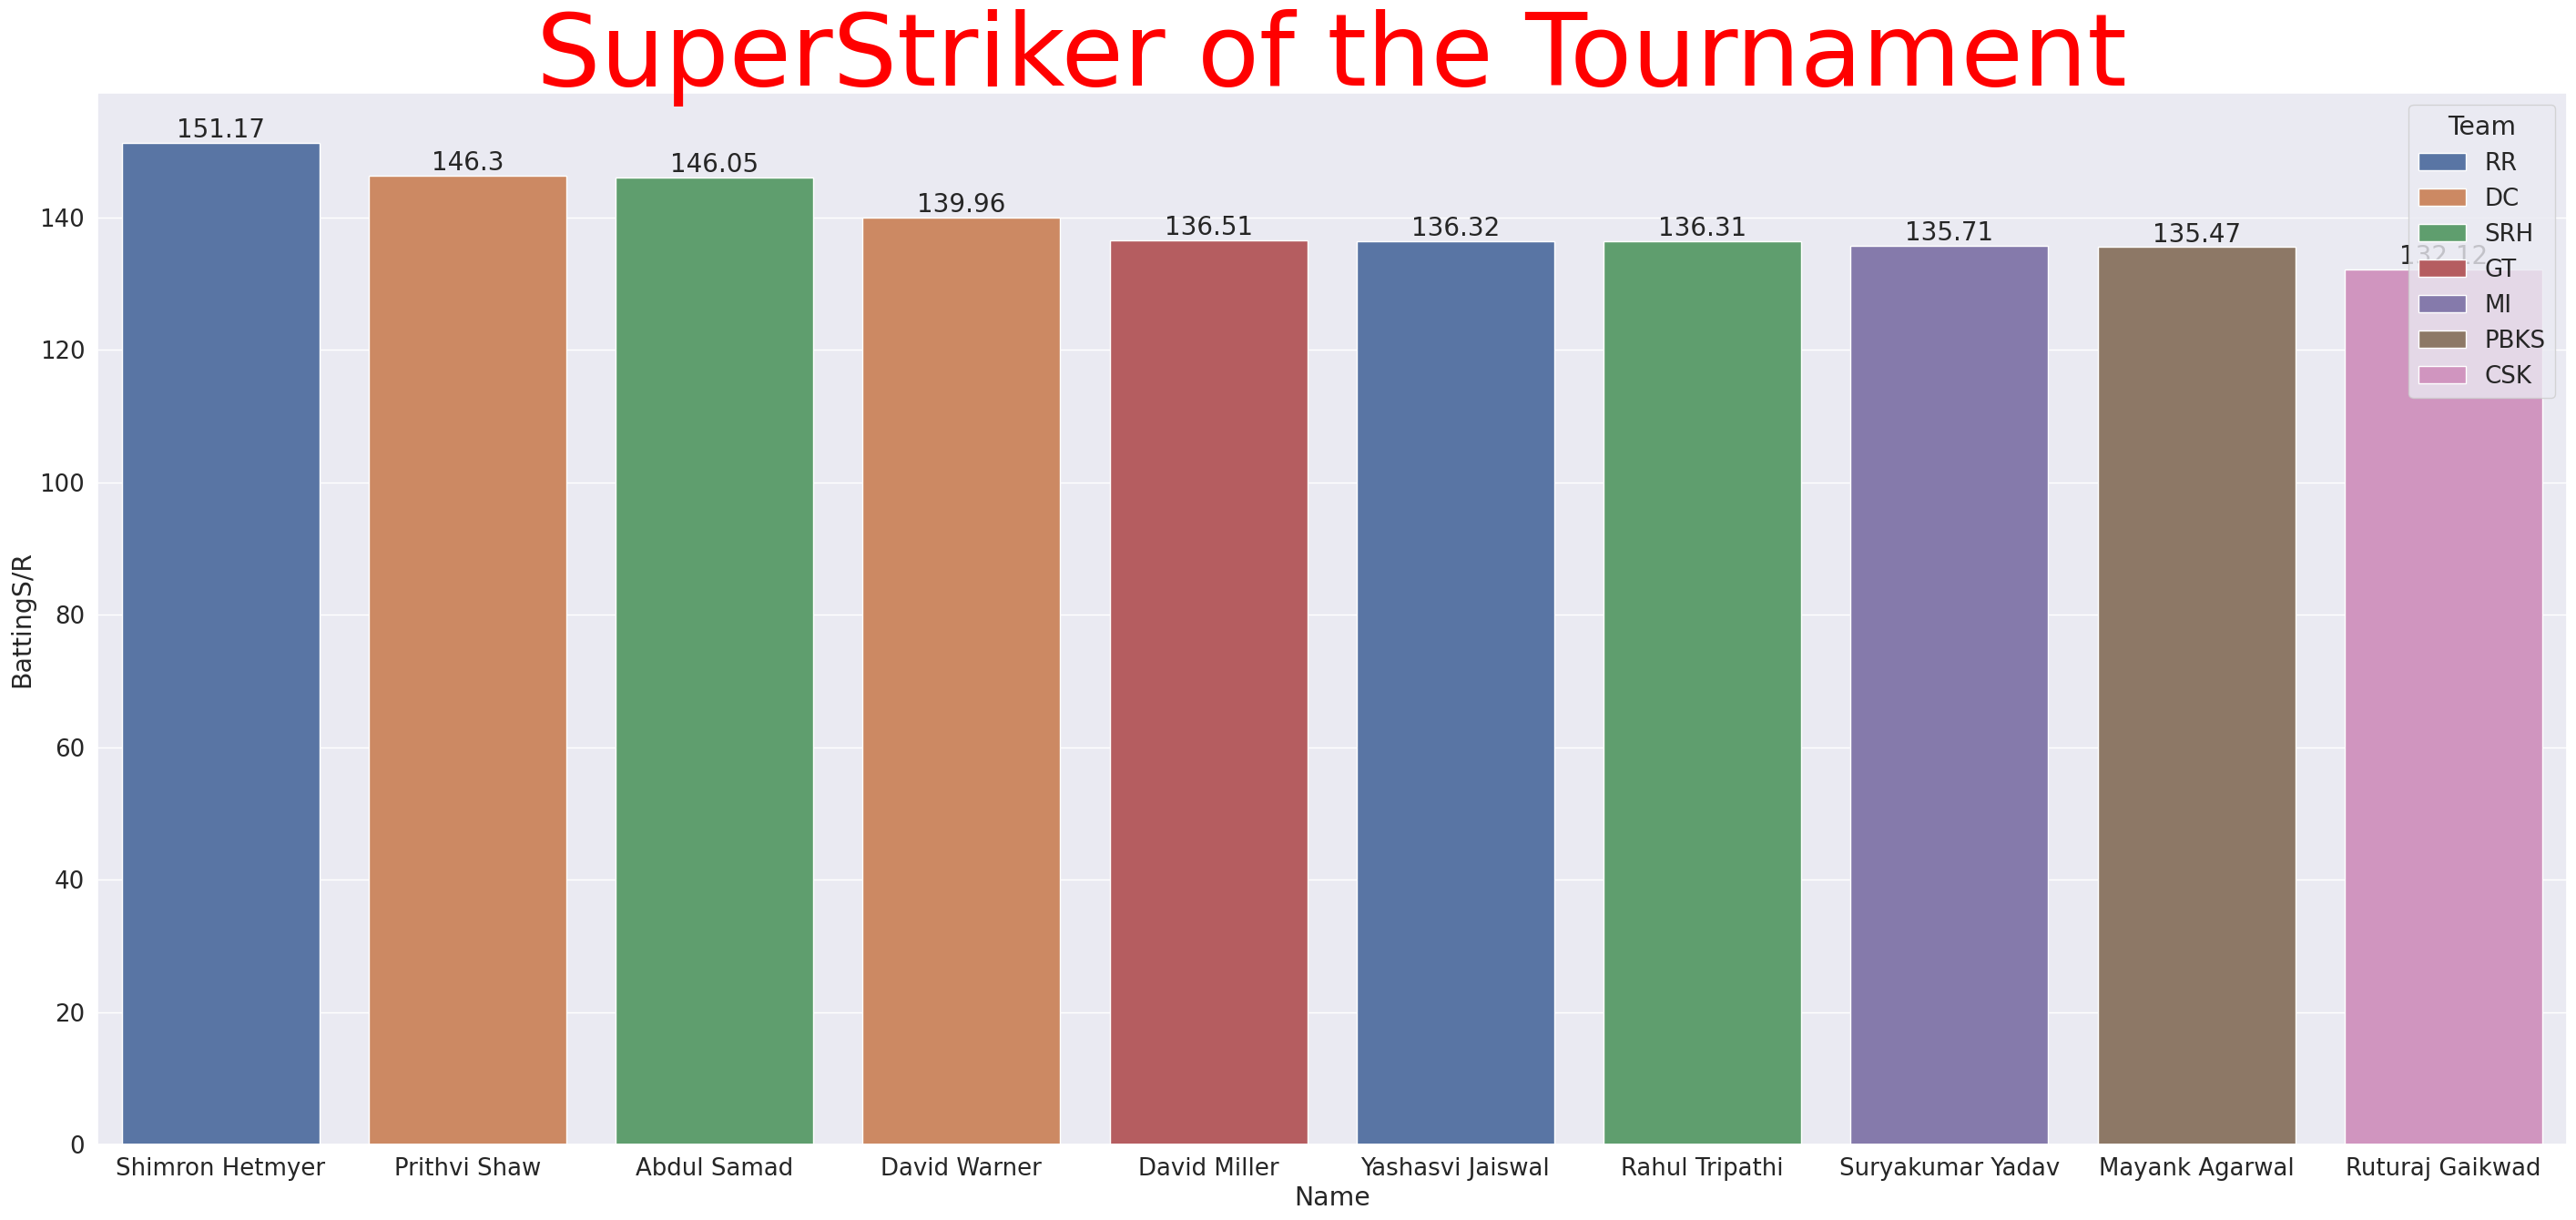

In [51]:
plt.figure(figsize = (35,15))
ax = sns.barplot(x = 'Name',y = 'BattingS/R',data = super_striker,hue = 'Team')
for i in range(0,7):
  ax.bar_label(ax.containers[i], fontsize=20);
sns.set(font_scale = 1.7)
plt.title('SuperStriker of the Tournament', fontsize='80', color='Red')

Text(0.5, 1.0, 'Runs by each Team')

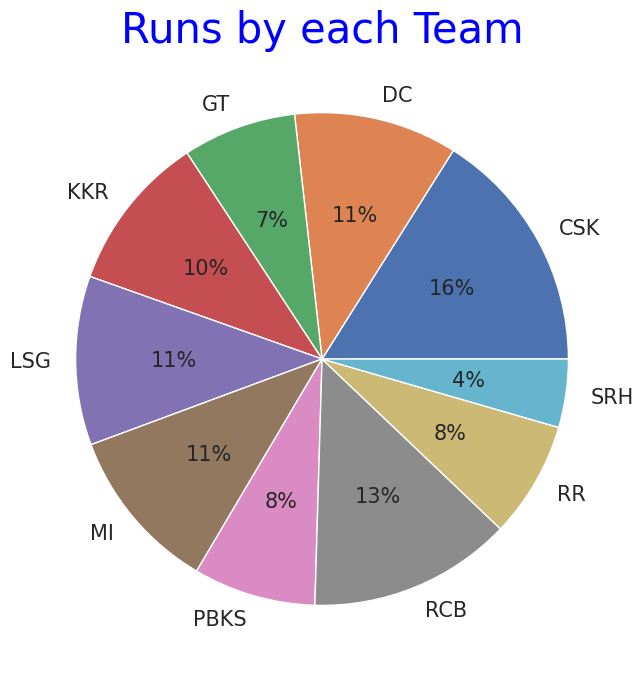

In [52]:
run_contribution = np.array(pdata.groupby(by=["Team"])["RunsScored"].sum())
teamLabel = ["CSK","DC","GT","KKR","LSG","MI","PBKS","RCB","RR","SRH"]
run_contribution

plt.figure(figsize = (8,8))
plt.pie(run_contribution,labels = teamLabel,autopct = "%1.0f%%",textprops={'fontsize': 15})
plt.title('Runs by each Team', fontsize='30', color='Blue')

Text(0.5, 1.0, 'Maximums')

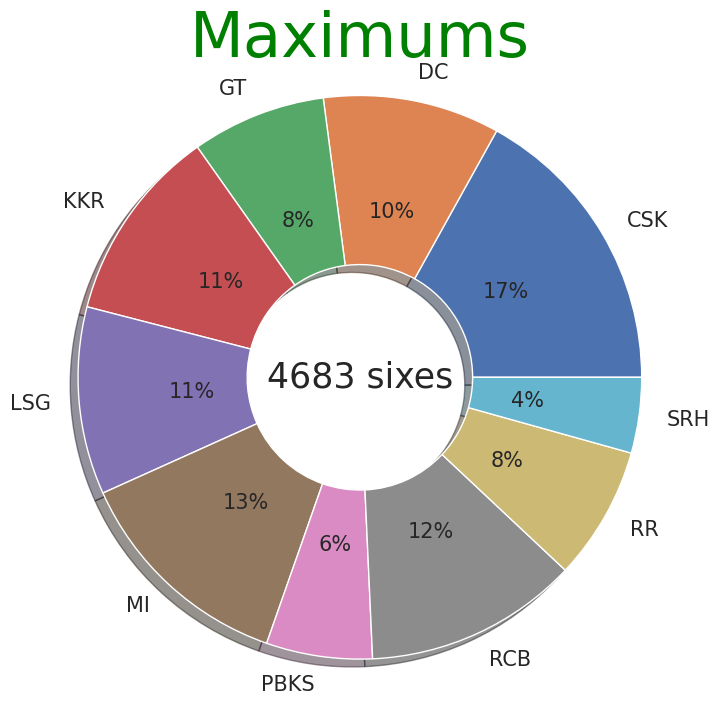

In [53]:
sixes = np.array(pdata.groupby(by=["Team"])["6s"].sum())
teamLabel = ["CSK","DC","GT","KKR","LSG","MI","PBKS","RCB","RR","SRH"]
sixes


sum = int(np.sum(sixes))
sum = str(sum) + " sixes"
plt.figure(figsize = (8,8))
plt.pie(sixes,labels = teamLabel,wedgeprops = dict(width = 0.6),autopct = "%1.0f%%",textprops={'fontsize': 15},shadow = True)
plt.text(0.,0.,sum,horizontalalignment = "center", verticalalignment = "center",fontsize = 25)
plt.axis("equal")
plt.title('Maximums', fontsize='45', color='Green')

Text(0.5, 1.0, 'Run Contribution')

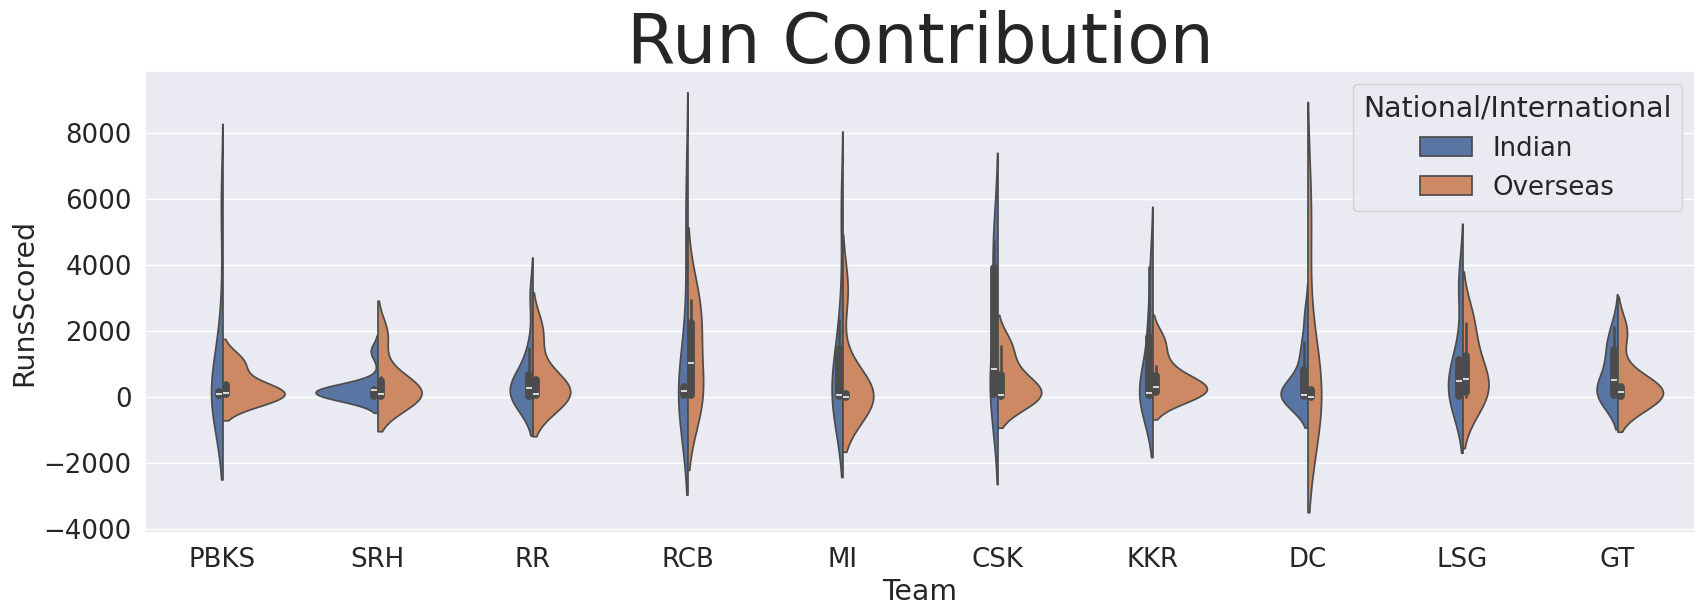

In [54]:
pdata['National/International'] = pdata['National Side'].apply(lambda x: 'Indian' if x == 'India' else 'Overseas')
plt.figure(figsize = (20,6))
sns.violinplot(x='Team', y='RunsScored', data=pdata, hue='National/International', split=True)
plt.title('Run Contribution', fontsize='50')

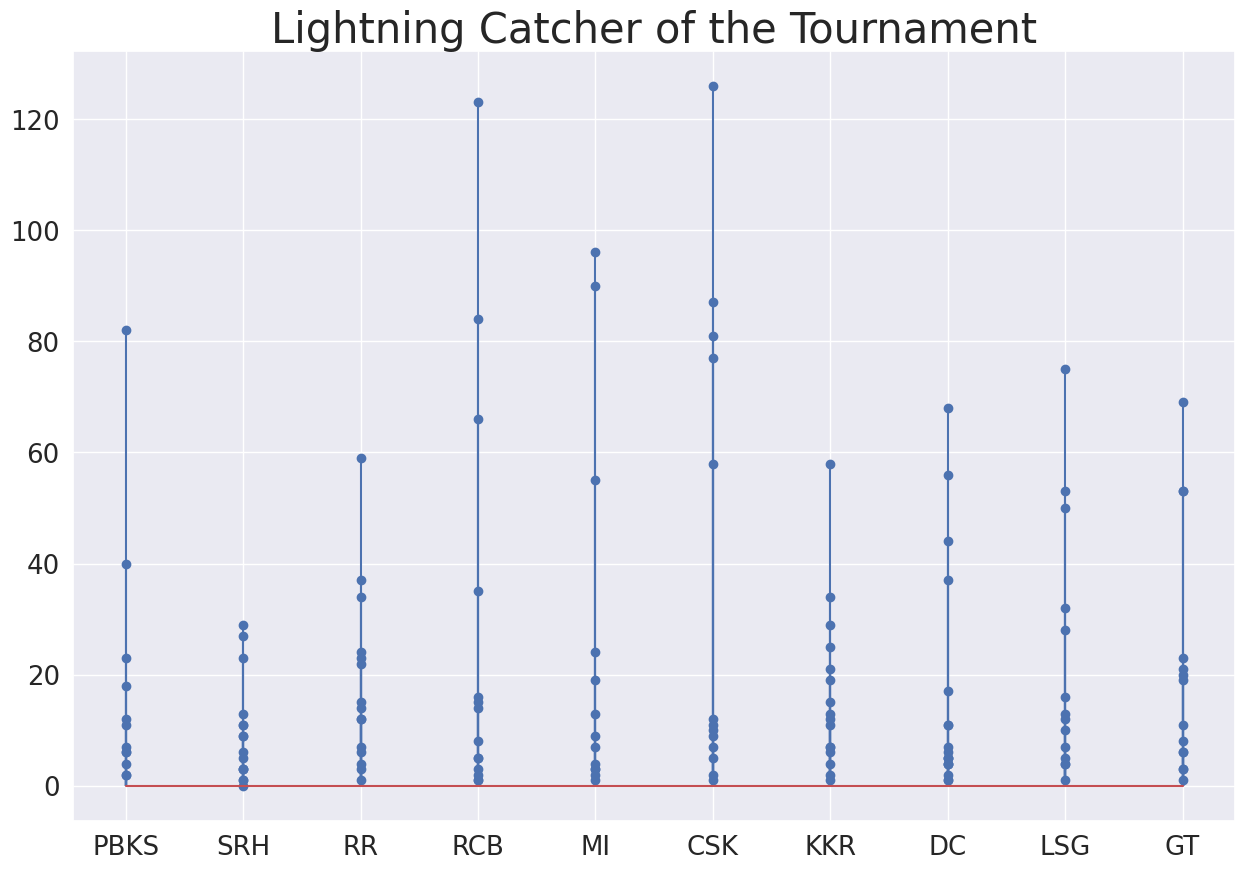

In [55]:
plt.figure(figsize = (15,10))
plt.stem(pdata['Team'], pdata['CatchesTaken'])
plt.title('Lightning Catcher of the Tournament', fontsize='30')
plt.show()

**MACHINE LEARNING MODEL**

In [56]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [57]:
match.shape

(756, 18)

In [58]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [59]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [60]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [61]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
170,85,1,144.0
172,86,1,103.0
174,87,1,187.0
176,88,1,129.0


In [62]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [63]:
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,2008,Chennai,2008-05-06,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,AC Gilchrist,"MA Chidambaram Stadium, Chepauk",MR Benson,RB Tiffin,NaN,85,144.0
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN,86,103.0
86,87,2008,Delhi,2008-05-08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN,87,187.0
87,88,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN,88,129.0


In [64]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [65]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [66]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [67]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [68]:
match_df.shape

(61, 20)

In [69]:
match_df = match_df[match_df['dl_applied'] == 0]

In [70]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [71]:
delivery_df = match_df.merge(delivery,on='match_id')

In [72]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [73]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13850,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
13851,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
13852,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


In [74]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [75]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [76]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [77]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,2,MV Boucher,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,115.0,14.0,28
13850,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,3,MV Boucher,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,117.0,12.0,27
13851,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,4,MV Boucher,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,119.0,10.0,26
13852,88,Kolkata,Kolkata Knight Riders,129.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,16,5,MV Boucher,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,120.0,9.0,25


In [78]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115,10


In [79]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [80]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [81]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [82]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [83]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [84]:
final_df = final_df.sample(final_df.shape[0])

In [85]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
3521,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,128.0,112,8,131.0,2.25,6.857143,0


In [86]:
final_df.dropna(inplace=True)

In [87]:
final_df = final_df[final_df['balls_left'] != 0]

In [88]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [89]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
10497,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,124.0,78,9,178.0,7.714286,9.538462
3094,Mumbai Indians,Kings XI Punjab,Indore,90.0,69,9,198.0,12.705882,7.826087
12895,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,72.0,79,9,126.0,7.902439,5.468354
433,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,79.0,61,7,157.0,7.932203,7.770492
8596,Delhi Daredevils,Deccan Chargers,Hyderabad,121.0,106,10,142.0,9.000000,6.849057
...,...,...,...,...,...,...,...,...,...
3566,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,87.0,70,3,131.0,5.280000,7.457143
5069,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,115.0,101,8,138.0,7.263158,6.831683
5511,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,139.0,109,10,158.0,10.363636,7.651376
3043,Mumbai Indians,Kings XI Punjab,Indore,196.0,118,10,198.0,6.000000,9.966102


In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [92]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [93]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [94]:
y_pred = pipe.predict(X_test)

In [95]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9749049429657795

In [97]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [98]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,99.4,0.6
10467,2,8.0,0,99.0,1.0
10473,3,1.0,0,99.3,0.7
10479,4,7.0,1,99.8,0.2
10485,5,12.0,0,99.6,0.4
10491,6,13.0,0,98.9,1.1
10497,7,9.0,0,98.2,1.8
10505,8,15.0,0,94.2,5.8
10511,9,7.0,0,92.5,7.5
10518,10,17.0,0,75.1,24.9


Text(0.5, 1.0, 'Target-178.0')

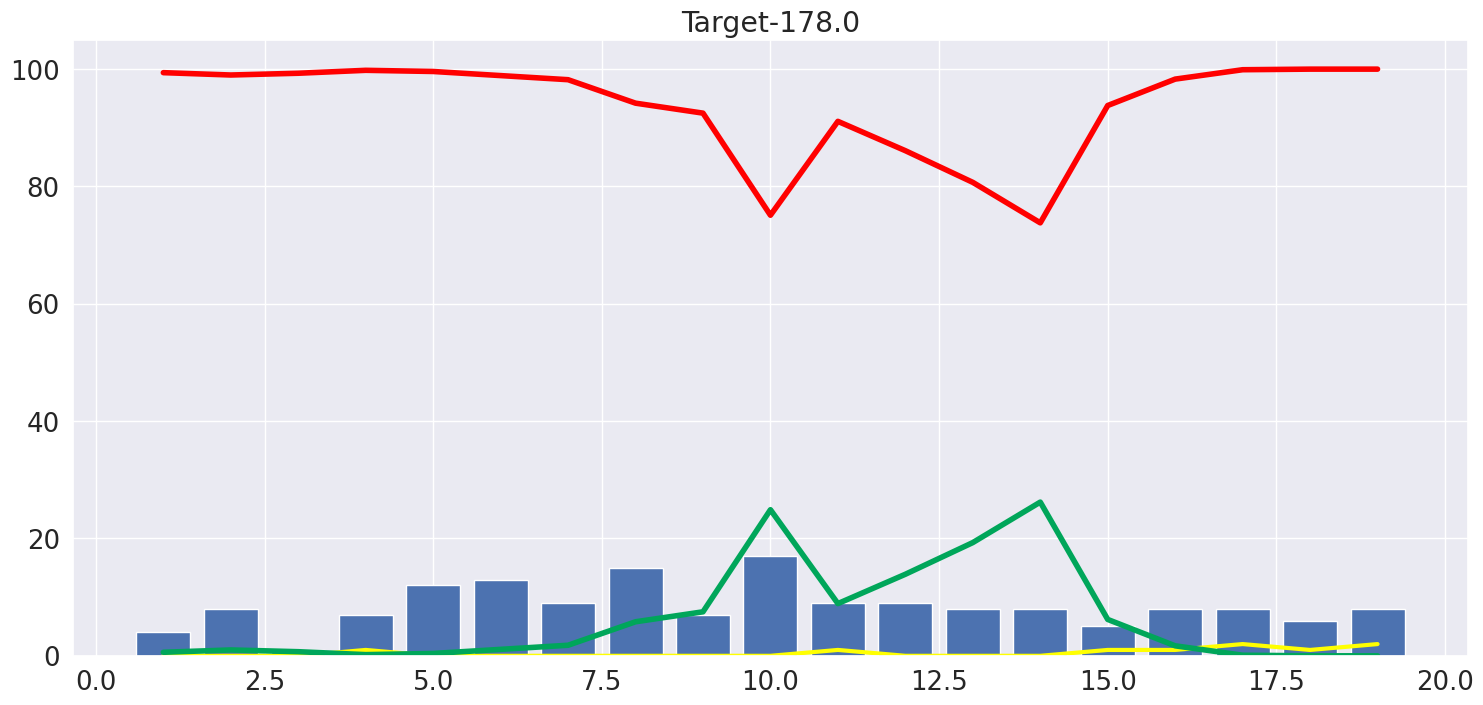

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [100]:
cases = 2

chaser = ['Chennai Super Kings','Chennai Super Kings']
defender = ['Mumbai Indians','Mumbai Indians']
venue = ['Mumbai','Chennai']
runs_left = [50,50]
balls_left = [18,18]
wickets_left = [7,7]
target = [200,200]
crr = []
rrr = []

for i in range(0,cases):
  crr.append(((target[i]-runs_left[i])*6)/(120 - balls_left[i]))
  rrr = (runs_left[i])*6/balls_left[i]

a = {
      'batting_team':chaser,
      'bowling_team':defender,
      'city':venue,
      'runs_left':runs_left,
      'balls_left':balls_left,
      'wickets_left':wickets_left,
      'total_runs_x':target,
      'crr':crr,
      'rrr':rrr
    }

a = pd.DataFrame(a)

res = pipe.predict(a)

for i in range(0,cases):
  print("Batting Team wins !!" if res[i]==1 else "Bowling Team wins !!")

Batting Team wins !!
Bowling Team wins !!


In [101]:
def gamble(data, pipe):
    temp_df = data[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose %'] = np.round(result.T[0]*100,1)
    temp_df['win %'] = np.round(result.T[1]*100,1)

    return temp_df

In [102]:
prediction = gamble(a, pipe)
prediction

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,lose %,win %
0,Chennai Super Kings,Mumbai Indians,Mumbai,50,18,7,200,8.823529,16.666667,24.6,75.4
1,Chennai Super Kings,Mumbai Indians,Chennai,50,18,7,200,8.823529,16.666667,70.8,29.2
